In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('adult_with_headers.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Instead of using both separately, this gives a net capital income view.
This also helps reduce dimensionality without losing information.

In [7]:
df['capital_net'] = df['capital_gain'] - df['capital_loss']

In [8]:
bins = [0, 30, 55, 100]
labels = ['young', 'middle', 'senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [9]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,capital_net
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,990.345014
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,7408.986951
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,-4356.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,99999.000000


## Here capital_gain,capital_loss,capital_net are highly skewed as 
- Very large max values
- Medians at 0
- Extreme standard deviations
- Most values are 0, with a few huge ones

In [10]:
import numpy as np
df['capital_gain'] = np.log1p(df['capital_gain'])
df['capital_loss'] = np.log1p(df['capital_loss'])

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

StandardScaler works well for: age, hours_per_week, education_num
-----------------------
MinMaxScaler is better for: fnlwgt, capital_gain, capital_loss due to extreme outliers and skewness
---------------------

In [12]:
cols = ['hours_per_week','education_num']

In [13]:
scaler_std = StandardScaler()
df_std_scaled = pd.DataFrame(scaler_std.fit_transform(df[cols]), columns=[col + '_std' for col in cols])

In [14]:
df_std_scaled.describe()

,hours_per_week_std,education_num_std
count,3.256100e+04,3.256100e+04
mean,5.995645e-16,2.312098e-17
std,1.000015e+00,1.000015e+00
min,-3.194030e+00,-3.529656e+00
25%,-3.542945e-02,-4.200596e-01
50%,-3.542945e-02,-3.136003e-02
75%,3.695194e-01,7.460392e-01
max,4.742967e+00,2.300838e+00


In [15]:
num_cols = ['fnlwgt','capital_gain','capital_loss','capital_net']

In [16]:
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df[num_cols]), columns=[col + '_minmax' for col in num_cols])

In [17]:
df_minmax_scaled.describe()

,fnlwgt_minmax,capital_gain_minmax,capital_loss_minmax,capital_net_minmax
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.120545,0.063808,0.041805,0.051232
std,0.071685,0.213216,0.189101,0.070998
min,0.000000,0.000000,0.000000,0.000000
25%,0.071679,0.000000,0.000000,0.041742
50%,0.112788,0.000000,0.000000,0.041742
75%,0.152651,0.000000,0.000000,0.041742
max,1.000000,1.000000,1.000000,1.000000


In [18]:
df = pd.concat([df, df_std_scaled, df_minmax_scaled], axis=1)

In [19]:
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,income,capital_net,age_group,hours_per_week_std,education_num_std,fnlwgt_minmax,capital_gain_minmax,capital_loss_minmax,capital_net_minmax
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,2174,middle,-0.035429,1.134739,0.044302,0.667492,0.0,0.062575
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,0,middle,-2.222153,1.134739,0.048238,0.000000,0.0,0.041742
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,0,middle,-0.035429,-0.420060,0.138113,0.000000,0.0,0.041742
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,0,middle,-0.035429,-1.197459,0.151068,0.000000,0.0,0.041742
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,0,young,-0.035429,1.134739,0.221488,0.000000,0.0,0.041742


In [20]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'capital_net', 'age_group', 'hours_per_week_std',
       'education_num_std', 'fnlwgt_minmax', 'capital_gain_minmax',
       'capital_loss_minmax', 'capital_net_minmax'],
      dtype='object')

In [21]:
drop_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss','capital_net', 'hours_per_week']
df = df.drop(columns=drop_cols)

In [22]:
df.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income', 'age_group',
       'hours_per_week_std', 'education_num_std', 'fnlwgt_minmax',
       'capital_gain_minmax', 'capital_loss_minmax', 'capital_net_minmax'],
      dtype='object')

In [23]:
df.rename(columns={
    'age_std': 'age',
    'hours_per_week_std': 'hours_per_week',
    'education_num_std':'education_num',
    'fnlwgt_minmax':'fnlwgt',
    'capital_gain_minmax':'capital_gain',
    'capital_loss_minmax':'capital_loss',
    'capital_net_minmax':'capital_net'}, inplace=True)

In [24]:
df.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income', 'age_group',
       'hours_per_week', 'education_num', 'fnlwgt', 'capital_gain',
       'capital_loss', 'capital_net'],
      dtype='object')

In [25]:
df.nunique()

workclass             9
education            16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
native_country       42
income                2
age_group             3
hours_per_week       94
education_num        16
fnlwgt            21648
capital_gain        119
capital_loss         92
capital_net         210
dtype: int64

In [26]:
df.nunique()[df.nunique()<=5]

race         5
sex          2
income       2
age_group    3
dtype: int64

In [27]:
df.dtypes

workclass           object
education           object
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
native_country      object
income              object
age_group         category
hours_per_week     float64
education_num      float64
fnlwgt             float64
capital_gain       float64
capital_loss       float64
capital_net        float64
dtype: object

In [28]:
df.select_dtypes(include='object').columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [29]:
df = pd.get_dummies(df,columns=['race','sex','age_group'])

In [30]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country',
 'income']

In [31]:
df[cat_cols].nunique()[df[cat_cols].nunique()>5].index.to_list()

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country']

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols_to_encode = ['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country']

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

In [33]:
df.head()

,workclass,education,marital_status,occupation,relationship,native_country,income,hours_per_week,education_num,fnlwgt,...,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,age_group_young,age_group_middle,age_group_senior
0,7,9,4,1,1,39,<=50K,-0.035429,1.134739,0.044302,...,0,0,0,0,1,0,1,0,1,0
1,6,9,2,4,0,39,<=50K,-2.222153,1.134739,0.048238,...,0,0,0,0,1,0,1,0,1,0
2,4,11,0,6,1,39,<=50K,-0.035429,-0.420060,0.138113,...,0,0,0,0,1,0,1,0,1,0
3,4,1,2,6,0,39,<=50K,-0.035429,-1.197459,0.151068,...,0,0,1,0,0,0,1,0,1,0
4,4,9,2,10,5,5,<=50K,-0.035429,1.134739,0.221488,...,0,0,1,0,0,1,0,1,0,0


## One-Hot Encoding
##### Pros:
- No order is assumed between categories (good for things like color, gender, etc.).
- Safe for all models, including linear models and SVM.
- Prevents the model from thinking that one category is "higher" than another.

##### Cons:
- Creates many new columns if there are many categories.
- Can use a lot of memory and slow down training (especially with high-cardinality columns).

## Label Encoding

##### Pros:
- Simple and fast — just numbers instead of new columns.
- Works well with tree-based models (e.g., decision trees, random forest).
- Memory efficient (only one column).

##### Cons:
- Adds fake order to the categories (e.g., category "A" = 0 and "B" = 1 makes model think B > A).
- Can confuse linear models, SVM, and distance-based models like KNN.

In [39]:
from sklearn.ensemble import IsolationForest

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols]

iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['is_outlier'] = iso_forest.fit_predict(X)

/Users/rajeshkaki/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [45]:
df[df['is_outlier'] == -1]

,workclass,education,marital_status,occupation,relationship,native_country,income,hours_per_week,education_num,fnlwgt,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,age_group_young,age_group_middle,age_group_senior,outliers,is_outlier
52,4,14,2,10,5,16,>50K,1.584366,1.912138,0.026861,...,0,0,1,1,0,0,1,0,-1,-1
93,4,11,2,12,5,0,<=50K,-0.440378,-0.420060,0.071625,...,0,0,0,1,0,0,1,0,-1,-1
106,0,0,4,0,3,39,<=50K,-0.683348,-1.586158,0.198712,...,0,0,1,1,0,1,0,0,-1,-1
157,6,15,5,12,4,39,<=50K,-3.113041,-0.031360,0.327310,...,1,0,0,0,1,0,0,1,-1,-1
297,0,12,2,0,5,0,<=50K,-0.035429,1.523438,0.098585,...,0,0,0,1,0,0,1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,4,14,2,4,0,39,>50K,-0.035429,1.912138,0.191948,...,0,0,1,0,1,0,1,0,-1,-1
32341,6,9,6,3,1,11,>50K,-2.627102,1.134739,0.126901,...,0,0,1,0,1,0,0,1,-1,-1
32469,5,10,4,10,1,0,<=50K,4.742967,2.300838,0.115245,...,0,0,1,1,0,0,0,1,-1,-1
32500,4,1,0,14,4,39,<=50K,1.584366,-1.197459,0.032791,...,0,0,1,0,1,0,1,0,-1,-1


In [46]:
df = df[df['is_outlier'] == 1].drop(columns='is_outlier')

In [47]:
df

,workclass,education,marital_status,occupation,relationship,native_country,income,hours_per_week,education_num,fnlwgt,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,age_group_young,age_group_middle,age_group_senior,outliers
0,7,9,4,1,1,39,<=50K,-0.035429,1.134739,0.044302,...,0,0,0,1,0,1,0,1,0,1
1,6,9,2,4,0,39,<=50K,-2.222153,1.134739,0.048238,...,0,0,0,1,0,1,0,1,0,1
2,4,11,0,6,1,39,<=50K,-0.035429,-0.420060,0.138113,...,0,0,0,1,0,1,0,1,0,1
3,4,1,2,6,0,39,<=50K,-0.035429,-1.197459,0.151068,...,0,1,0,0,0,1,0,1,0,1
4,4,9,2,10,5,5,<=50K,-0.035429,1.134739,0.221488,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,4,7,2,13,5,39,<=50K,-0.197409,0.746039,0.166404,...,0,0,0,1,1,0,1,0,0,1
32557,4,11,2,7,0,39,>50K,-0.035429,-0.420060,0.096500,...,0,0,0,1,0,1,0,1,0,1
32558,4,11,6,1,4,39,<=50K,-0.035429,-0.420060,0.094827,...,0,0,0,1,1,0,0,0,1,1
32559,4,11,4,1,3,39,<=50K,-1.655225,-0.420060,0.128499,...,0,0,0,1,0,1,1,0,0,1


In [50]:
import ppscore as pps
import pandas as pd

pps_matrix = pps.matrix(df)

pps_matrix[pps_matrix['ppscore'] > 0].sort_values(by='ppscore', ascending=False).head()

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,workclass,workclass,1.0,predict_itself,True,None,0.0000,1.0,None
375,race_ Black,race_ Black,1.0,predict_itself,True,None,0.0000,1.0,None
175,hours_per_week,hours_per_week,1.0,predict_itself,True,None,0.0000,1.0,None
193,education_num,education,1.0,regression,True,mean absolute error,2.6414,0.0,DecisionTreeRegressor()
200,education_num,education_num,1.0,predict_itself,True,None,0.0000,1.0,None


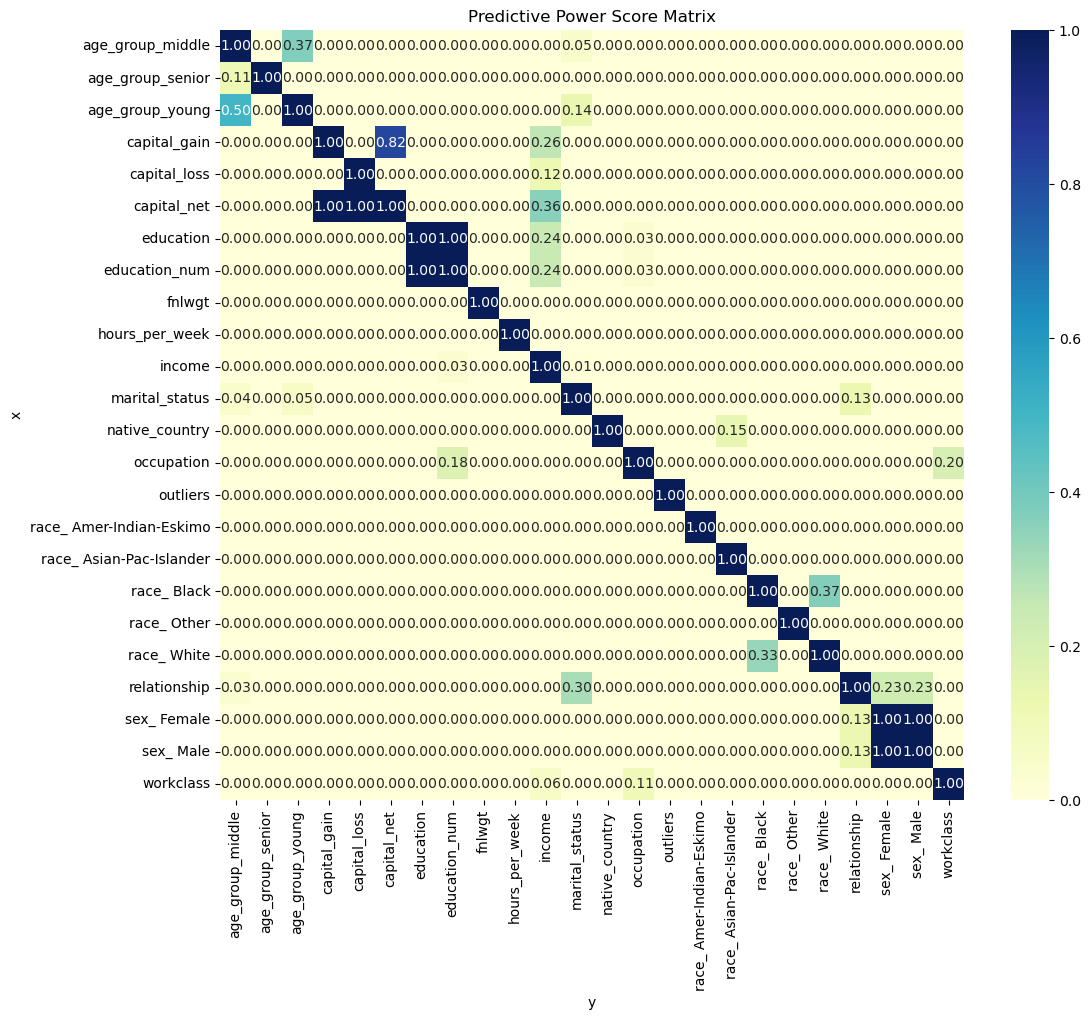

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

pps_df = pps.matrix(df)[['x', 'y', 'ppscore']]
pps_matrix_pivot = pps_df.pivot(index='x', columns='y', values='ppscore')

plt.figure(figsize=(12, 10))
sns.heatmap(pps_matrix_pivot, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Predictive Power Score Matrix")
plt.show()

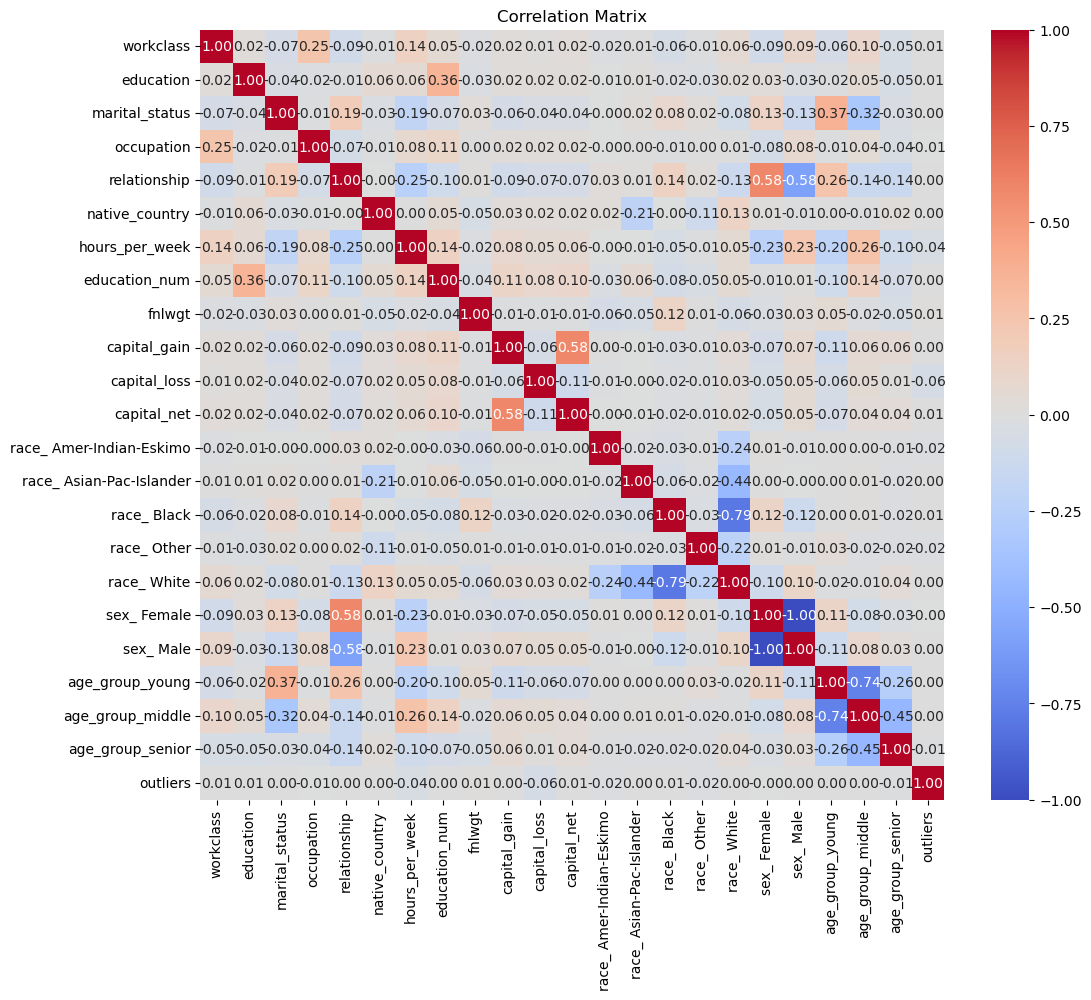

In [53]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The Predictive Power Score (PPS) matrix reveals stronger and more meaningful relationships than the correlation matrix, especially for categorical and non-linear features. For example, PPS shows that education_num perfectly predicts education (score = 1.0), while correlation underestimates this with a moderate value. Similarly, features like capital_gain, marital_status, and relationship show higher PPS values toward predicting income than their weak linear correlations suggest. PPS is asymmetric and captures real predictive power, making it more suitable than correlation for identifying valuable input features in machine learning models.